# Intro to Machine Learning using the Iris dataset

## Explore the data

Now fetch the Iris dataset from sklearn. `X` are the inputs and `y` is the target.

In [5]:
import pandas as pd
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)
target_names = dataset["target_names"]
X = dataset["data"]
y = dataset["target"].astype("category")

model_feature_id = "target"
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

What do the target integers mean?

In [14]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Combine the data and look at the distributions

In [7]:
df = pd.concat([X,y], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


What does the input look like? Is it numeric or categorical?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Examine the basic stats for the column values

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Are there any missing values?

In [16]:
df.isna().mean()

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

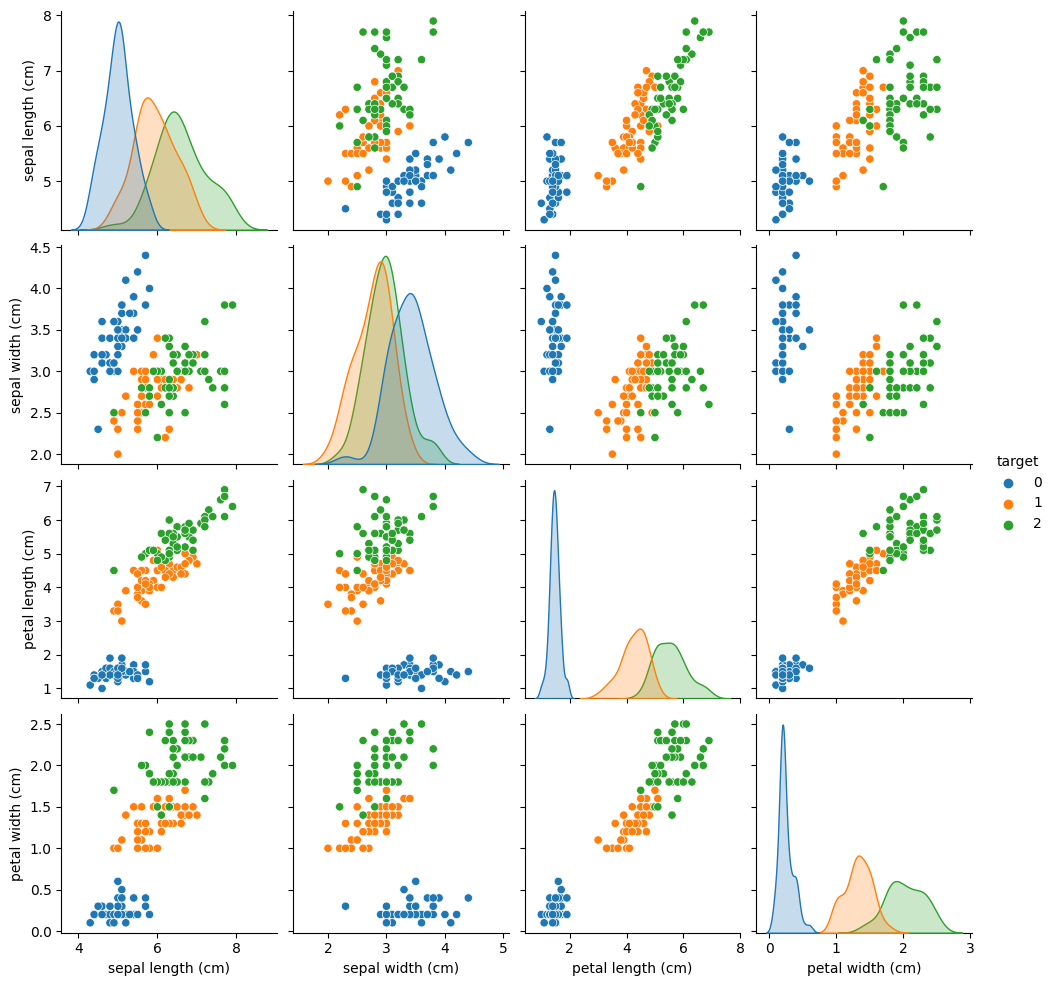

In [13]:
import seaborn as sns

sns.pairplot(df, hue='target')

Can you spot any trends?

Now split the data into sub-samples for train and test. The idea here is to keep some samples back that the model hasn't seen before and then  We will use 80% of records for training and save 20% back for testing.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False, stratify=None)

What does the training data look like? Could we have prepared it any better to give the model a better chance of having a more general view of the data? (clue: shuffle and stratify)

In [23]:
pd.value_counts(y_train)

0    50
1    50
2    20
Name: target, dtype: int64

## Train an ML model

We will use a simple Logistic Regression from sklearn to start with. The default scoring metric, from the `model.score()` function, is accuracy, i.e. number of correct predictions.

The model does pretty well on known data

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

/Users/rossparkin/Projects/ak/ml-intro/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9833333333333333

How does the model do on unseen data?

In [28]:
model.score(X_test, y_test)

0.8333333333333334

We can also use a bunch of other metrics from sklearn to understand how well the model performed. First get some predictions

In [30]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.83      0.91        30

    accuracy                           0.83        30
   macro avg       0.50      0.42      0.45        30
weighted avg       1.00      0.83      0.91        30



/Users/rossparkin/Projects/ak/ml-intro/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rossparkin/Projects/ak/ml-intro/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rossparkin/Projects/ak/ml-intro/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

For classification problems, a confusion matrix gives you an idea of how well you are predicting classes and helps visualise true positives, false positives, etc.

[[ 0  0]
 [ 5 25]]


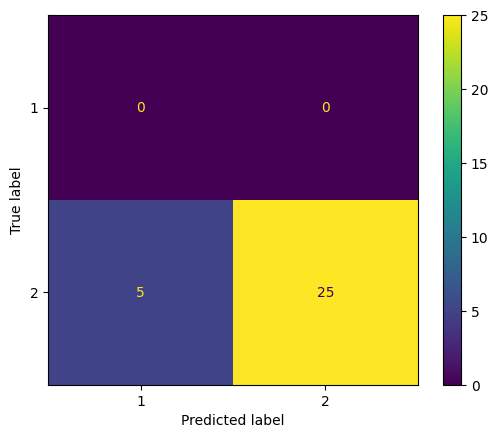

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## This is great but how would I actually use a model?

Put simply, we save it to a file and then reload it when we need to make predictions. In ML lingo we would say that the model is trained `offline` and then predictions are served `online`.

In the following we will save a model to disk, delete the object, reload it from disk and then make predictions.

In [45]:
from joblib import dump, load
model_path = 'iris_model.joblib'
dump(model, model_path)
del model
model = load(model_path)
y_pred2 = model.predict(X_test)
y_pred2


array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])